**I/O (Input / Output)** 

- 프로그램 입장에서 들어오는 모든 데이터를 input, 나가는 모든 데이터를 output이라고 한다.
> 메인 메모리 입장에서 생각하는 들어오고 나가는 모든 데이터에 대해서 I/O 처리라고 부릅니다. (단, CPU와의 소통은 제외)

- 사용자로 부터 키보드로 입력받는 것을 stdin이라고 하며, 사용자에게 다시 모니터로 출력되는 것을 stdout이라고 한다. -> Unix 환경(터미널 환경)에서 부르던 용어


# STDIN / STDOUT (Standard IN, Standard OUT)

- 파이썬은 input()을 통해서 stdin을 사용자로부터 입력받을 수 있다.
- 파이썬에서는 stdin은 무조건 문자열 타입으로 들어온다. 이를 type casting을 통해서 다른 데이터 타입으로 바꾸어 사용해야 한다.

- 파이썬은 print()를 통해서 stdout을 사용자에게 출력할 수 있다.

**Q. 만약에 stdin으로 여러 개의 숫자가 들어오는 경우, 입력의 format을 알고 있다고 가정했을 때, 이를 효과적으로 처리할 수 있을까?**

In [1]:
list_a = input("콤마를 기준으로 숫자를 여러개 입력해주세요 : ").split(',')
list_b = []
for i in list_a:
    list_b.append(int(i))
print(list_b)


콤마를 기준으로 숫자를 여러개 입력해주세요 : 1,2,3,4,5,6,7,8,9,10
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [9]:
list_b = []
for i in input("콤마를 기준으로 숫자를 여러개 입력해주세요 : ").split(','):
    list_b.append(int(i))
print(list_b)

콤마를 기준으로 숫자를 여러개 입력해주세요 : 1,2
[1, 2]


In [2]:
list_b=[int(i) for i in input("콤마를 기준으로 숫자를 여러개 입력해주세요 : ").split(',')]
print(list_b)

콤마를 기준으로 숫자를 여러개 입력해주세요 : 1,2,3,4,5
[1, 2, 3, 4, 5]


# File I/O

- 파일 입출력을 사용하는 이유
    - 파일로부터 데이터를 읽어와서 프로그램에 사용하기 위해
    - 프로그램에서 만든 데이터를 파일 형태로 저장하기 위해
- 파이썬에서는 open()을 이용해서 파일을 손쉽게 열고 닫을 수 있다.
- open()을 통해 파일을 열고 난뒤엔, close()를 통해서 닫아줘야 한다. ( close를 하지 않으면 jupyter가 계속해서 파일을 점유하고 있게 되어, 시스템 낭비가 일어난다. )
- open() 함수는 다양한 옵션을 제공하지만 기본적으로는 txt파일을 여는 것을 기본으로 가정한다.
- 다른 타입의 파일을 열기 위해선 다른 라이브러리들이 필요하다. (csv, excel : pandas, png, jpg : PIL, opencv...)

> 텍스트 파일을 여는 방법에는 read(), readline(), readlines(), for문을 이용한 방법이 있다. 코드를 통해 각 방법의 차이를 알아보자.

## open() / close()
- **open('파일경로', '모드')** 
- 모드-> w(wirte), a(append), r(read)
| 모드 | <center>설명</center>| 모드 | <center>설명</center>|
| --- | :--- | --- | :--- |
| w | 쓰기 | r | 읽기 |
| a | 쓰기(append) | x | 파일이 없으면 생성하고 있으면 err 발생|
| t | 텍스트모드(기본값) | b | 바이너리 모드 예시) wb / rb |


- **파일객체.close()**
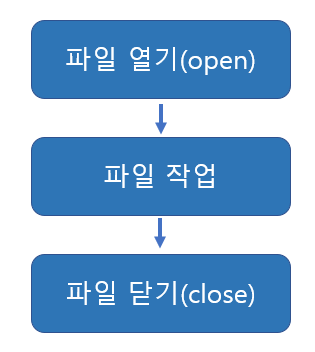

## 파일쓰기
- 파일객체 = open('파일경로','모드')   
- 파일객체.write(데이터)
- 파일객체.close()

In [27]:
#파일 생성
file = open('Data/newfile1.txt','w')
file.write('Hello Python\n')
file.close()

In [18]:
# 파일 읽기
file = open('data/newfile1.txt', 'r')
line = file.read()
print(line)
file.close()

Life is Short


In [26]:
#파일 생성 
file = open('Data/newfile1.txt','w')
file.write('Life is Short')
file.close()

In [29]:
# 파일 내용 추가(append)
file = open('data/newfile1.txt', 'a')
file.write('Life is Short\n')

file.close()

In [31]:
#x는 파일이 없으면 생성하고 있으면 에러가 난다
file = open('data/newfile2.txt', 'x')
file.write('You Need Python\n')

file.close()

## with open('파일경로', '모드') as 별명 :
- 파일을 자동으로 열고 닫을 수 있도록 처리
- with open() as 별명 -> 자동으로 close() 호출한다.

In [34]:
#파일 생성
with open('Data/newfile1.txt','w') as file :
    file.write('Hello Python\n')


## 파일을 쓰기 모드로 열어 출력값 기록하기
- open('파일경로',**'w'**) as file :
- file.write(**내용**)

In [37]:
for i in range(1,11):
    data = f"{i}'s line.\n"
    print(data,end='')


1's line.
2's line.
3's line.
4's line.
5's line.
6's line.
7's line.
8's line.
9's line.
10's line.


In [42]:
    with open('Data/newfile2.txt','w') as file :
        for i in range(1,11):
            data = f"{i}'s line.\n"
            print(data,end='')
            file.write(data)

1's line.
2's line.
3's line.
4's line.
5's line.
6's line.
7's line.
8's line.
9's line.
10's line.


- **한글처리**

In [46]:
#파일 생성
with open('Data/newfile3.txt','w' ,encoding='utf-8') as file:
    file.write('안녕하세요 파이썬\n')
    

## 외부파일을 읽는 여러가지 방법
텍스트 읽기 **read(), readline(), readlines(), 반복문...**
- read(): 파일에 있는 모든 글자를 가져와서 하나의 String으로 저장한다.
- readline(): 파일에 있는 첫번째 줄만 가져온다.
- readlines 는 txt 파일에 있는 모든 텍스트를 한줄 단위로 끊어서 리스트에 저장

In [51]:
with open('Data/newfile2.txt','r',encoding='utf-8')as file:
    contents = file.read()
    
print(contents,type(contents))

1's line.
2's line.
3's line.
4's line.
5's line.
6's line.
7's line.
8's line.
9's line.
10's line.
 <class 'str'>


In [ ]:
with open('Data/newfile2.txt','r',encoding='utf-8')as file:
    contents = file.read()
    
print(contents,type(contents))

In [57]:
with open('D:/gorororo/PYTHONSTUDY/training/Data/newfile2.txt','r')as file:
    contents = file.read()
    
print(contents,type(contents))

1's line.
2's line.
3's line.
4's line.
5's line.
6's line.
7's line.
8's line.
9's line.
10's line.
 <class 'str'>


In [66]:
with open('Data/newfile2.txt','r',encoding='utf-8')as file:
    contents = file.readline()
    
print(contents,type(contents))

1's line.
 <class 'str'>


In [64]:
with open('Data/newfile2.txt','r',encoding='utf-8')as file:
    contents = file.readlines()
    
print(contents,type(contents))

["1's line.\n", "2's line.\n", "3's line.\n", "4's line.\n", "5's line.\n", "6's line.\n", "7's line.\n", "8's line.\n", "9's line.\n", "10's line.\n"] <class 'list'>


## 이진파일 처리
**pickle 모듈**
- 객체의 형태를 그대로 유지하면서 파일에 저장하고 불러올 수 있게 하는 파이썬 내장모듈
- pickle.dump(객체, 파일)로 저장하고(쓰고)
- pickle.load(파일) 로 로딩(읽고)

In [72]:
import pickle

planets = {'수성' : 'Mercury',
           '금성' : 'Venus',
           '지구' : 'Earth',
           '화성' : 'Mars',
           '목성' : 'Jupiter',
           '토성' : 'Saturn',
           '천왕성' : 'Uranus',
           '해왕성' : 'Neptune'
          }

In [73]:
file = open('data/data.pickle',"wb")
pickle.dump(planets, file)
file.close()

In [75]:
import pickle
file = open('data/data.pickle',"rb")
planets = pickle.load(file)
print(planets)
file.close()

{'수성': 'Mercury', '금성': 'Venus', '지구': 'Earth', '화성': 'Mars', '목성': 'Jupiter', '토성': 'Saturn', '천왕성': 'Uranus', '해왕성': 'Neptune'}


In [76]:
import pickle
with open('data/data.pickle',"rb") as file :
    planets = pickle.load(file)
    print(planets)


{'수성': 'Mercury', '금성': 'Venus', '지구': 'Earth', '화성': 'Mars', '목성': 'Jupiter', '토성': 'Saturn', '천왕성': 'Uranus', '해왕성': 'Neptune'}


**연습문제1) 사용자 입력(input())을 파일에 저장(파일명: ex1.txt)하는 프로그램을 구성하시오.**
- 단, 프로그램을 다시 실행하더라도 기존에 작성한 내용을 유지하고 새로 입력된 내용이 추가되어야 함.

In [79]:
#파일 생성
open('Data/ex1.txt','a' ,encoding="utf-8") as file :
data = input()
file.write(data)


input data


**연습문제2) 위에서 만든 파일을 읽어와서 출력(print()) 하시오.**

In [102]:
# 파일 읽기
file = open('data/ex1.txt', 'r',encoding="utf-8")
line = file.read()
print(line)
file.close()

input data


In [103]:
with open('data/ex1.txt','r', encoding='utf-8') as file :
    print(file.read())

input data


**연습문제3) 100명의 신체정보를 담고 있는 bodyinfo.txt를 생성하기 파일(info.txt)를 열어서 BMI를 계산하여 bodyinfo2.txt 생성하기**
- 신체정보 : name, weight, height
- name :  '가나다라마바사아자차카타파하' 중 무작위로 3글자
- weight : 40~100 사이 무작위 정수
- height : 140~200 사이 무작위 정수

< bodyinfo.txt(000~999) >
> 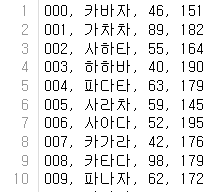

In [134]:
import random

hanguls = '가나다라마바사아자차카타파하'

with open('Data/bodyinfo.txt','w',encoding="utf-8") as file:
    for i in range(100):
        name = ''.join(random.choices(hanguls, k=3))
        #         print(name)
        weight = random.randint(40,100)
        height = random.randint(140,200)
        file.write(f'{str(i).zfill(3)},{name},{weight},{height}\n')

**연습문제4) 위에서 생성한 bodyinfo.txt에 100명의 데이터를 추가하시오.(총 200명)**

In [135]:
# 데이터 추가
import random

a = '가나다라마바사아자차카타파하'

with open('Data/bodyinfo.txt','a',encoding="utf-8") as file :
    for i in range(100,200):
        name = ''.join(random.choices(a, k=3))
        weight = random.randint(40,100)
        height = random.randint(140,200)
        file.write(f'{str(i).zfill(3)},{name},{weight},{height}\n')
        

**연습문제5)bodyinfo.txt를 열어서 BMI지수를 계산하고 그 결과를 표시하고 bodyinfo2.txt에 저장하시오.**
- BMI지수= 몸무게(kg) ÷ (신장(m) × 신장(m))
- 25 <= BMI : 과체중
- 18.5 <= BMI < 25 : 정상체중
- BMI < 18.8 : 저체중

In [167]:
with open('Data/bodyinfo.txt','r',encoding="utf-8") as file : # 위드 오픈으로 상대경로 r모드 인코딩 유티에프 8로 불러오고 별명은 file
    lines=file.readlines() # 변수 선언 하고 파일.리드라인함수를 대입
    new_datas = [] #마지막 파일쓰기 를 위해 빈리스트 생성
    
    
    for line in lines: #라인 변수 선언 하고 라인즈 안에 넣는다
        #new_line = line.split(',')
        new_line = line.replace(' ','').split(',') #리스트에서 하나씩 뺴서 ' '<만약 두칸 뛰어졌으면 공백을 없에고 ,''남은공백도 없엔다 그리고 스플릿으로 나눈다.
        new_line[3] = new_line[3][:3] #빼낸 리스트의 3번 리스트 인덱스에 접근 다시 3번인덱스이 처음부터 3번째 인댁스까지 빼내서 넣는다
        
        #bmi계산
        bmi = int(new_line[2])/((int(new_line[3])/100)**2)# 정수로 만든다 2번 인덱스가 체중 3번인덱스가 신장 cm기 떄문에 /100 을하고 제곱을 해서 bmi 지수를 계산하고 
        bmi = round(bmi,2) # 계산한걸
        new_line.append(str(bmi)) #뉴라인에 비엠아이 지수를 추가시킨다 문자형으로 변환
        
        
        if 25 <= float(new_line[4]) : new_line.append('과체중') #만약 25가 뉴라인 인덱스[4]번(bmi지수) 보다 크다면 과체중 이란 단어를 뉴라인에 어펜드(추가)시킨다 아니라면 밑으로
        elif 18.5 <= float(new_line[4]) : new_line.append('정상체중') #만약 18.5가 뉴라인 인덱스[4]번(bmi지수) 보다 크다면 정상체중 이란 단어를 뉴라인에 어펜드(추가)시킨다
        else: new_line.append('저체중') #만약 위에 둘다 아니라면 저체중을 인덱스 4번에 추가시킨다
        new_datas.append(new_line) #위에 if문을 새로만든 빈리스트 뉴데이터에 추가시킨다.
        
# print(new_datas)        
with open('Data/bodyinfo2.txt','w',encoding='utf-8') as file2 : #위는 읽기 모드기 떄문에  새로 쓰기모드를 만든다
    for data in new_datas : #포문 데이터 변수를 추가 하고 뉴데이터 리스트에 넣는다
        file2.write(', '.join(data)+'\n') #파일에 쓰기 한다 ', '를 추가시켜 데이터를 조인시킨다 마지막에 줄바꿈을 넣어준다 완료
        

**연습문제6) 당신의 회사에서는 매주 1회 작성해야 하는 보고서가 있습니다.**
**보고서는 항상 아래와 같은 형식으로 출력되어야 합니다.**

-X 주차 주간보고-   
부서 :   
이름 :   
업무요약   

**1주차부터 10주차까지의** 보고서 파일(양식)을 만든는 프로그램을 작성하시오.   

- 조건 : 파일명은 '1주차.txt', '2주차.txt', ....와 같이 만듭니다

In [172]:
for i in range(1,11): #포문 i 룰 1번부터 11번 반복하라
    with open('Data/{}주차.txt'.format(i),'w', encoding='utf-8') as re: # 파일을 만든다 파일네임에{}중가로 를 넣고 뒤에 포멧팅을 붙여준다
        re.write(f'-{i}주차 주간보고-')
        re.write('\n부서 :')
        re.write('\n이름 :')
        re.write('\n업무요약 :')
        